In [15]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import pyqg

In [20]:
pyqg

<module 'pyqg' from '/Users/mattpudig/anaconda3/envs/PhD/lib/python3.8/site-packages/pyqg/__init__.py'>

In [2]:
# Grid, dimensions
L =  1000e3     # length scale of box   [m]
Ld = None# 100e3       # deformation radius    [m]
nx = 256.       # number of grid cells per direction

# Height and topography
H = 1e3         # Mean height of layer  [m]
hy = 0. #1e-5   # Gradient of topographic slope in y
hx = 0. #1e-5   # Gradient of topographic slope in x

# Plantary stuff
f0 = 0.#1e-4
beta = 1e-11
rek = 0.

# Time
tmax = 60 * 60 * 24 * 5  # model run time [s]
dt = 10800 / 50                # time step [s]. NB: < 12500.0, which is the time step that worked with similar grid size for 2 layer model no topography


# Create the model object
m = pyqg.BTModel(L = L, rd = Ld, nx = nx,
                 beta = beta, rek = rek,
                 H = H, 
                 tmax = tmax, dt = dt, twrite = 1.)

# m.run()

INFO:  Logger initialized


INFO:  Logger initialized


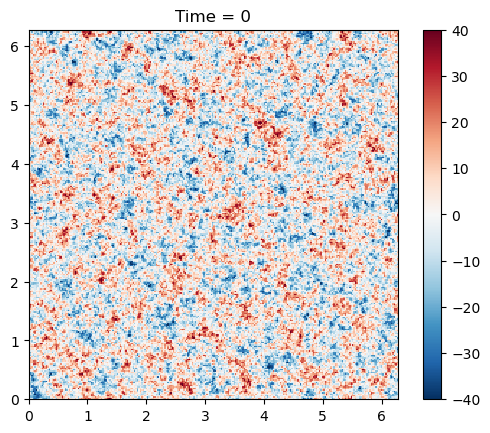

In [19]:
# create the model object
m = pyqg.BTModel(L=2.*np.pi, nx=256,
                 beta=0., H=1., rek=0., rd=None,
                 tmax=40, dt=0.001, taveint=1)

# generate McWilliams 84 IC condition

fk = m.wv != 0
ckappa = np.zeros_like(m.wv2)
ckappa[fk] = np.sqrt( m.wv2[fk]*(1. + (m.wv2[fk]/36.)**2) )**-1

nhx,nhy = m.wv2.shape

Pi_hat = np.random.randn(nhx,nhy)*ckappa +1j*np.random.randn(nhx,nhy)*ckappa

Pi = m.ifft( Pi_hat[np.newaxis,:,:] )
Pi = Pi - Pi.mean()
Pi_hat = m.fft( Pi )
KEaux = m.spec_var( m.wv*Pi_hat )

pih = ( Pi_hat/np.sqrt(KEaux) )
qih = -m.wv2*pih
qi = m.ifft(qih)

# initialize the model with that initial condition
m.set_q(qi)

# define a quick function for plotting and visualize the initial condition
def plot_q(m, qmax=40):
    fig, ax = plt.subplots()
    pc = ax.pcolormesh(m.x,m.y,m.q.squeeze(), cmap='RdBu_r')
    pc.set_clim([-qmax, qmax])
    ax.set_xlim([0, 2*np.pi])
    ax.set_ylim([0, 2*np.pi]);
    ax.set_aspect(1)
    plt.colorbar(pc)
    plt.title('Time = %g' % m.t)
    plt.show()

plot_q(m)

INFO: Step: 1000, Time: 1.00e+00, KE: 4.96e-01, CFL: 0.141
INFO: Step: 2000, Time: 2.00e+00, KE: 4.95e-01, CFL: 0.119
INFO: Step: 3000, Time: 3.00e+00, KE: 4.94e-01, CFL: 0.118
INFO: Step: 4000, Time: 4.00e+00, KE: 4.93e-01, CFL: 0.112
INFO: Step: 5000, Time: 5.00e+00, KE: 4.93e-01, CFL: 0.111
INFO: Step: 6000, Time: 6.00e+00, KE: 4.93e-01, CFL: 0.130
INFO: Step: 7000, Time: 7.00e+00, KE: 4.93e-01, CFL: 0.118
INFO: Step: 8000, Time: 8.00e+00, KE: 4.93e-01, CFL: 0.112
INFO: Step: 9000, Time: 9.00e+00, KE: 4.93e-01, CFL: 0.102
INFO: Step: 10000, Time: 1.00e+01, KE: 4.92e-01, CFL: 0.094


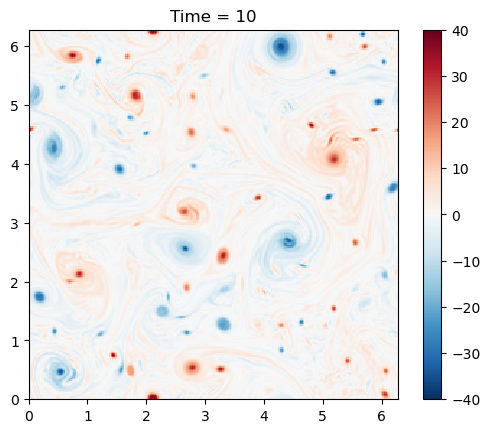

INFO: Step: 11000, Time: 1.10e+01, KE: 4.92e-01, CFL: 0.103
INFO: Step: 12000, Time: 1.20e+01, KE: 4.92e-01, CFL: 0.103
INFO: Step: 13000, Time: 1.30e+01, KE: 4.92e-01, CFL: 0.095
INFO: Step: 14000, Time: 1.40e+01, KE: 4.92e-01, CFL: 0.110
INFO: Step: 15000, Time: 1.50e+01, KE: 4.92e-01, CFL: 0.103
INFO: Step: 16000, Time: 1.60e+01, KE: 4.92e-01, CFL: 0.114


KeyboardInterrupt: 

In [17]:
for _ in m.run_with_snapshots(tsnapstart=0, tsnapint=10):
    plot_q(m)